In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
db=automap_base()
db.prepare(engine,reflect=True)
# reflect the tables


In [7]:
# View all of the classes that automap found
db.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measure=db.classes.measurement
station=db.classes.station


In [9]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
measure.__table__.columns.values()

[Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<measurement>),
 Column('date', TEXT(), table=<measurement>),
 Column('prcp', FLOAT(), table=<measurement>),
 Column('tobs', FLOAT(), table=<measurement>)]

In [11]:
date=session.query(measure.date).all()
data_df=pd.DataFrame(date)
data_df
data_df['start_date'] = pd.to_datetime(data_df['date'])
now=data_df['start_date'].max()

In [12]:
from datetime import date, timedelta
 
today_date = date.today()
 
print("CURRENT DAY : ", today_date)
 
# as said earlier it takes argument as day by default
td = timedelta(-365)
print("AFTER 5 DAYS DATE WILL BE : ", now + td)

CURRENT DAY :  2021-09-30
AFTER 5 DAYS DATE WILL BE :  2016-08-23 00:00:00


this is the most current date: ['2017-08-23']
one year from most recent date 2016-08-23 00:00:00


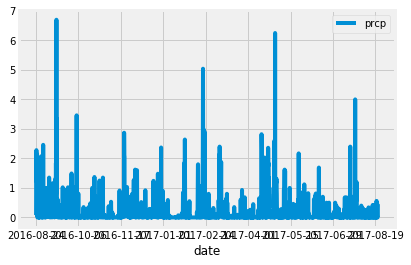

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
current=session.query(measure.date).order_by(measure.date.desc()).first()
current_date=list(current)
print("this is the most current date:", current_date)
# Calculate the date one year from the last date in data set.
print('one year from most recent date',now +td)
last_year=now+td

#test=current_date[0]
test=str(last_year)

# Perform a query to retrieve the data and precipitation scores
rain=session.query(measure.date, measure.prcp).\
filter(measure.date>=test).\
order_by(measure.date).\
all()
last_year
test
#rain

# Save the query results as a Pandas DataFrame and set the index to the date column
rain_df=pd.DataFrame(rain)
rain_df1=rain_df.sort_values('date')
rain_date_index=rain_df1.set_index('date')
#rain_date_index_sorted=rain_date_index.sort_values('date',ascending=True)
rain_date_index
# Sort the dataframe by date
rain_cleaned=rain_date_index.dropna()
rain_cleaned
# Use Pandas Plotting with Matplotlib to plot the data

rain_cleaned.plot()



In [14]:
rain_cleaned_dict=rain_cleaned.to_dict()
rain_cleaned_dict

{'prcp': {'2016-08-24': 1.45,
  '2016-08-25': 0.11,
  '2016-08-26': 0.02,
  '2016-08-27': 0.12,
  '2016-08-28': 2.07,
  '2016-08-29': 0.0,
  '2016-08-30': 0.05,
  '2016-08-31': 0.1,
  '2016-09-01': 0.0,
  '2016-09-02': 0.03,
  '2016-09-03': 1.0,
  '2016-09-04': 0.74,
  '2016-09-05': 0.18,
  '2016-09-06': 0.04,
  '2016-09-07': 0.23,
  '2016-09-08': 0.15,
  '2016-09-09': 0.29,
  '2016-09-10': 1.16,
  '2016-09-11': 0.6,
  '2016-09-12': 0.0,
  '2016-09-13': 0.32,
  '2016-09-14': 6.7,
  '2016-09-15': 0.12,
  '2016-09-16': 0.07,
  '2016-09-17': 0.23,
  '2016-09-18': 0.0,
  '2016-09-19': 0.25,
  '2016-09-20': 0.43,
  '2016-09-21': 0.02,
  '2016-09-22': 0.75,
  '2016-09-23': 0.15,
  '2016-09-24': 0.0,
  '2016-09-25': 0.04,
  '2016-09-26': 0.06,
  '2016-09-27': 1.0,
  '2016-09-28': 0.05,
  '2016-09-29': 0.04,
  '2016-09-30': 0.38,
  '2016-10-01': 0.14,
  '2016-10-02': 0.61,
  '2016-10-03': 0.04,
  '2016-10-04': 0.0,
  '2016-10-05': 0.81,
  '2016-10-06': 0.0,
  '2016-10-07': 0.01,
  '2016-10-08'

In [126]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_cleaned.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [128]:
# Design a query to calculate the total number stations in the dataset
total_stations=session.query(station.id).count()
print("Total Stations:",total_stations)

Total Stations: 9


In [136]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measure.station, func.count(measure.station)).group_by(measure.station).\
order_by(func.count(measure.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [137]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measure.tobs), func.max(measure.tobs),func.avg(measure.tobs)).filter(measure.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

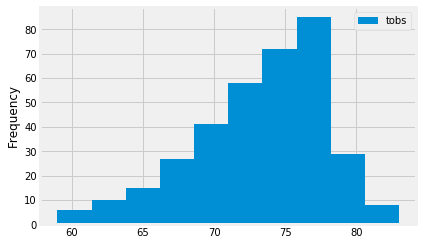

In [141]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
hist_data=session.query(measure.tobs).filter(measure.station=='USC00519281').filter(measure.date>=test).all()
hist=pd.DataFrame(hist_data)
hist.plot.hist()
plt.show()

# Close session

In [142]:
# Close Session
session.close()